# pyTorch (파이토치)

## 개요

- https://pytorch.org/
- python/C++/Java 를 기반으로 한 딥러닝 구현을 위한 오픈소스 라이브러리
- GPU 지원은 nvidia 만 가능(CUDA만 사용가능)
- Lua(루아, 핵심사용언어), C++ 등으로 개발했다.
- 아직까지는 텐서플로우가 더 많이 사용되나, 점차 확산을 하고 있는 추세
- Facebook 인공지능팀 개발(= 뉴욕대 협업)
- 딥러닝 프레임워크(엔진)
- 장점
    - 복잡하고 계산량이 많은 그래프를 쉽게 구성한다.
    - 계산 그래프를 활용하면 미분/적분도 간단하게 처리
    - GPU 연산을 손쉽게 활용하여 빠른 처리가 가능

## 특징

- numpy를 기반으로 Tensor 연산을 GPU로 수행가능
- 자동 미분 시스템을 이용하여 모델을 손쉽게 구성
- 같이 활용되는 python 패키지
    - scipy
    - Numpy
    - Cython : 파이썬의 빠른 생산성, 외부 C 라이브러리와 간결하게 연동, 실행속도를 향상
- 학습, 추론 속도가 빠르다. 다루기도 쉽다.

## pyTorch vs Tensorflow

- 2019년도 기준 : 2위(pyTorch), 1위(Tensorflow)
- Tensorflow
    - Define-and-Run 방식
        - 1. 계산 그래프, 데이터 플로우 그래프를 설계
        - 2. 세션(session)에서 그래프에 들어갈 데이터(수치값, 숫자)를 주입
        - 3. 세션 실행
    - 산업용
- pyTorch
    - Define-by-Run 방식
        - 1. 계산 그래프를 그리는 동시에
        - 2. 주입할 데이터(숫자, 수치값)를 보관하고
        - 3. 연산 실행 바로 가능하다.
    - 학계/연구용으로 주로 사용, 2018년에 1.0이 런칭된 후, 산업용으로 넓히고 있다.

In [0]:
import torch

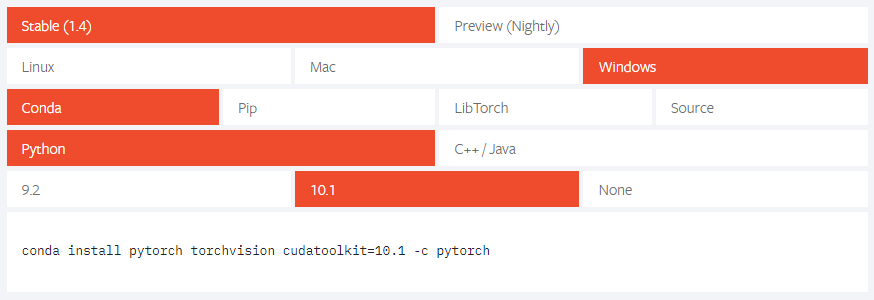

In [3]:
# 로컬PC나 딥러닝 서버에서 사용한다면
# https://pytorch.org/ 사이트에서 본인의 환경에 맞게 시뮬레이션 하면 설치 명령이 나온다.
from IPython.display import Image
Image('/content/pyTorch_install.png', width=700)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 텐서

- 딥러닝은 텐서를 기반으로 진행되는 계산(연산)의 연속
- 딥러닝 구현상 가장 중요한 기본 단위

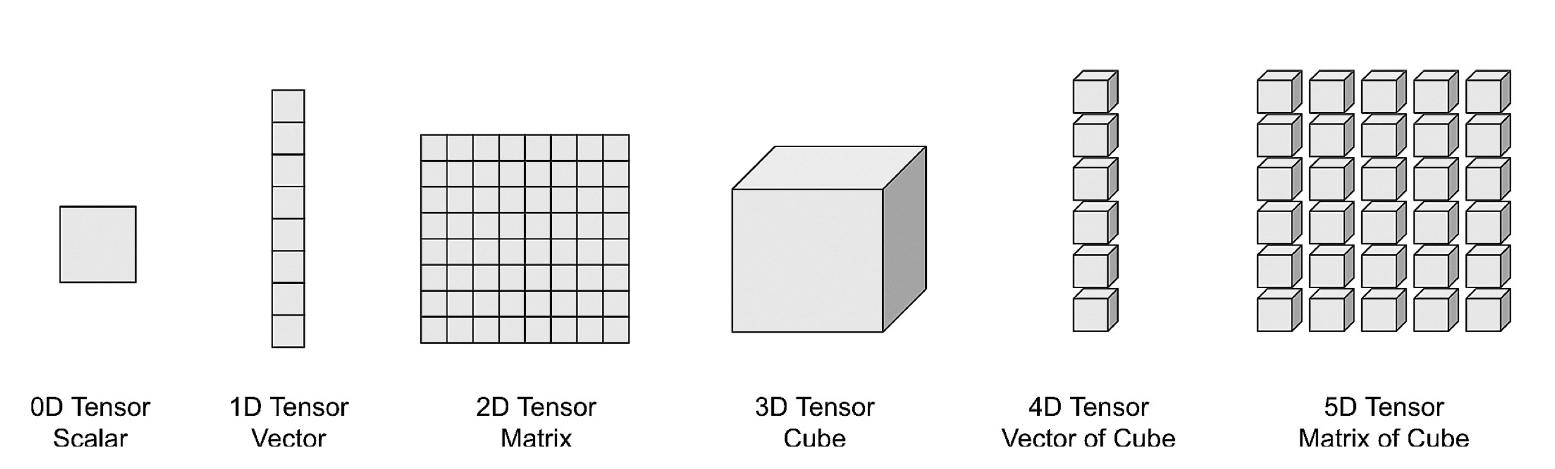

In [6]:
Image('/content/8.tensor.jpeg', width=600)

# 텐서 생성

- Tensor(리스트 or 배열)
    - 원소가 정수에서 float32로 자동 변환
    - 단, 옵션에 따라서 유지될 수도 있지 않을까?

In [3]:
# 리스트로부터 텐서 생성
list_src = [[10, 11, 12], [20, 21, 22]]     # (2, 3)

# 텐서 생성
x = torch.Tensor(list_src)
x

# define by run 이라는 취지에서 이미 텐서에 데이터가 설정되어 있음을 알 수 있다.

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [4]:
# 복원 : 텐서 -> 리스트 추출, to
# 타입 복구가 불가(형변환하기 전에는)
x.tolist()

[[10.0, 11.0, 12.0], [20.0, 21.0, 22.0]]

In [5]:
# numpy의 ndarray(배열)을 재료로 텐서 생성
arr = np.array(x.tolist())
arr

array([[10., 11., 12.],
       [20., 21., 22.]])

In [6]:
x = torch.Tensor(arr)
x

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [7]:
# 복원 -> 타입 복구가 불가(형변환하기 전에는)
x.numpy()

array([[10., 11., 12.],
       [20., 21., 22.]], dtype=float32)

# GPU 사용

- colab에서 노트 속성을 GPU 사용으로 변경
    - 런타임이 다 초기화된다.

## pyTorch GPU 사용

In [8]:
x.device

device(type='cpu')

In [9]:
# NVIDIA
device = 'cuda'

try:
    x = x.to(device)
    print('%s 지원' % device)

except Exception as e:
    print('%s 미지원' % device, e)

cuda 지원


In [10]:
# 이 텐서는 GPU에서 연산한다. -> 텐서별로 GPU, CPU를 지정할 수 있다.
x.device

device(type='cuda', index=0)

In [11]:
# 텐서를 cpu 연산으로 변경 처리
x = x.to('cpu')
x.device

device(type='cpu')

## Tensorflow GPU 사용

In [0]:
import tensorflow as tf

# 지원되는 하드웨어
from tensorflow.python.client import device_lib

In [13]:
# 지원되는 하드웨어 목록 중에서 device_type: "GPU" 를 찾고
# name: "/device:GPU:0" 의 이름을 챙겨둔다.
# memory_limit: 17179869184 등 메모리 제한 크기를 확인하여
# 차후 학습 시 batch_size에 대한 가이드를 판단한다.
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4234151229104593496, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 888423603121751289
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10577259427409471497
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14224857498
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1017202049678147917
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
# GPU 연산
# 통산 Session이 열려진 지점부터 사용한다.
# 여기서는 간단하게 표현만 확인
with tf.device('/device:GPU:0'):
    a = tf.constant([[1, 2, 3], [4, 5, 6]])     # 2x3
    b = tf.constant([[1, 2], [3, 4], [5, 6]])   # 3x2
    c = tf.matmul(a, b)
    print(c)

    # 데이터 플로우 그래프 실행
    with tf.Session() as sess:
        print(sess.run(c))

In [15]:
with tf.device('/device:CPU:0'):
    a = tf.constant([[1, 2, 3], [4, 5, 6]])     # 2x3
    b = tf.constant([[1, 2], [3, 4], [5, 6]])   # 3x2
    c = tf.matmul(a, b)
    print(c)

    # 데이터 플로우 그래프 실행

Tensor("MatMul_1:0", shape=(2, 2), dtype=int32, device=/device:CPU:0)


In [17]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow is already loaded. Please restart the runtime to change versions.
Found GPU at: /device:GPU:0


In [18]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

TensorFlow is already loaded. Please restart the runtime to change versions.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.17669117900004494
GPU (s):
0.18546379400004298
GPU speedup over CPU: 0x


## Keras GPU 사용

In [0]:
from keras import backend as K

In [20]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
sess = tf.Session()

from keras.backend import tensorflow_backend as K

# 메모리가 부족하면 자동적으로 증가 : 
# GPU 메모리를 작업에 올인해서 사용하는가? 
# 일부만 사용하다가 부족하면 증설하는가?
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config)

with tf.device('/device:GPU:0'):
    pass

sess.close()

# 텐서 생성2

- 랜덤 텐서

In [14]:
# 0~1사이로 랜덤하게, 2x3 행렬을 생성해라.
# 파라미터 중에 *size -> [가변인자], shape을 설명하는 
torch.rand(2, 3)

tensor([[0.2945, 0.2640, 0.0379],
        [0.0466, 0.6311, 0.6397]])

In [15]:
# 0~8까지 랜덤, 2x3
torch.randint(low=0, high=8, size=(2, 3))

tensor([[0, 6, 6],
        [7, 1, 2]])

In [16]:
# 제로 텐서
torch.zeros(2, 2)   # 0 행렬 생성

tensor([[0., 0.],
        [0., 0.]])

In [19]:
x = torch.ones(3, 3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [20]:
# 매개변수 x의 shape과 동일한 텐서를 만들고 0으로 채운다.
torch.zeros_like(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [21]:
torch.ones_like(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
# GPU를 사용해서 처리한다면
torch.zeros_like(x.cuda())

# 텐서의 타입

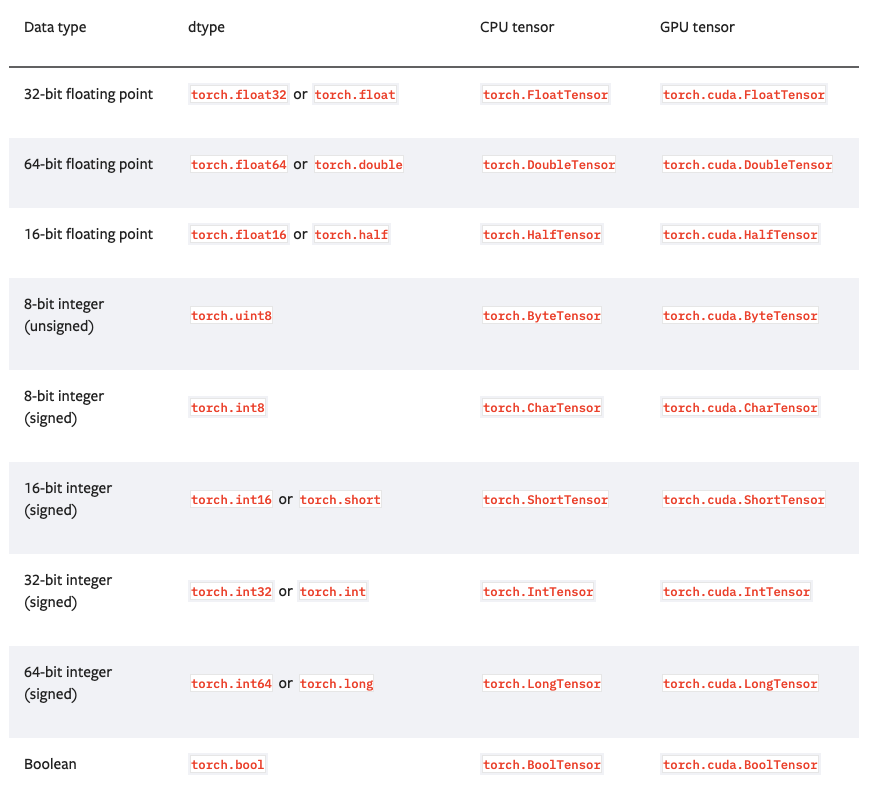

In [23]:
Image('/content/8.torch_type.png', width=800)

In [24]:
# 실수형 텐서
a = torch.FloatTensor(np.array([1, 2, 3, 4]))
a, type(a), a.type()

# 파이토치에서 타입확인은 : xxx.type()을 사용한다.

(tensor([1., 2., 3., 4.]), torch.Tensor, 'torch.FloatTensor')

In [25]:
# 정수형 텐서
a = torch.LongTensor(np.array([1, 2, 3, 4]))
a, type(a), a.type()

(tensor([1, 2, 3, 4]), torch.Tensor, 'torch.LongTensor')

In [28]:
# 불린형 텐서
a = torch.BoolTensor(np.array([True, False, True]))
a, type(a), a.type()

(tensor([ True, False,  True]), torch.Tensor, 'torch.BoolTensor')

# 텐서 조작(행렬 조작)

- slicing
- view
- transpose
- squeeze, unsqueeze
- cat, stack
- sum, mean
- max, argmax, min, argmin
- 사칙 연산(+, -, *, /)
- 논리 연산

In [29]:
# 시드(seed) 고정 -> 발생되는 난수의 순서를 고정 -> 실험 시 유용하게 변수(상황)들을 통제하기 위해서
# 512(임시 설정값)
torch.manual_seed(512)

In [35]:
# 크기 2x3x4 인 3차(3D) Tensor(= 큐브), 값은 0~9까지 랜덤 정수로 생성
x = torch.randint(0, 10, size=(2, 3, 4))
x

tensor([[[3, 2, 0, 3],
         [7, 8, 1, 3],
         [7, 2, 4, 3]],

        [[4, 5, 2, 3],
         [2, 9, 1, 7],
         [1, 4, 7, 8]]])

## 인덱싱, 슬라이싱, 원본 조작, 시각화

In [40]:
# 인덱싱은 전형적인 표현, [1차, 2차, 3차, ...] 이렇게도 표현 가능
x[0][0], x[0, 0], x[0, 0, 0]

(tensor([3, 2, 0, 3]), tensor([3, 2, 0, 3]), tensor(3))

In [0]:
# 텐서의 시각화 함수
# src : Tensor
def drawTensor(src):
    fig, axes = plt.subplots(len(src), 1)

    for i in range(len(src)):

        # src.numpy() : 텐서를 배열로 복원
        axes[i].matshow(src.numpy()[i], vmin=0, vmax=1, cmap='gray')
    
    plt.show()

In [48]:
# 시각화 할 텐서 준비
tmp = torch.ones_like(x)
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

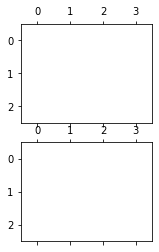

In [44]:
# 조작 전 tmp를 드로잉, 1이면 흰색
drawTensor(tmp)

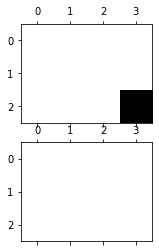

In [45]:
tmp[0, 2, 3] = 0
drawTensor(tmp)

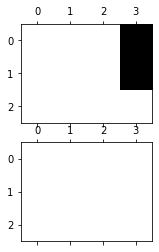

In [49]:
# 차원별로 변경된 부분을 검토하면 간단하게 해결
# 1차원 -> 2차원 -> 3차원
tmp[0, :2, 3] = 0
drawTensor(tmp)

- 텐서에서 특정 정보를 추출, 변경할 경우
- 인덱싱(차원 축소) or 슬라이싱을 통해서 처리가 가능
- 표현
    - 텐서명[1차, 2차, 3차, ...]

## view

- 텐서의 shape을 변경(= reshape)

In [52]:
x.shape, x.dtype, x.ndim, x

(torch.Size([2, 3, 4]), torch.int64, 3, tensor([[[3, 2, 0, 0],
          [7, 8, 1, 0],
          [7, 2, 4, 3]],
 
         [[4, 5, 2, 3],
          [2, 9, 1, 7],
          [1, 4, 7, 8]]]))

In [53]:
# shape 변경
x.reshape(2, 2, 6)

tensor([[[3, 2, 0, 0, 7, 8],
         [1, 0, 7, 2, 4, 3]],

        [[4, 5, 2, 3, 2, 9],
         [1, 7, 1, 4, 7, 8]]])

In [54]:
x.view(2, 2, 6)

tensor([[[3, 2, 0, 0, 7, 8],
         [1, 0, 7, 2, 4, 3]],

        [[4, 5, 2, 3, 2, 9],
         [1, 7, 1, 4, 7, 8]]])

In [55]:
# -1을 사용한다면 -> 몇 개 나올지 모르겠다. 알아서 맞춰달라.
x.view(-1, 1, 12)

tensor([[[3, 2, 0, 0, 7, 8, 1, 0, 7, 2, 4, 3]],

        [[4, 5, 2, 3, 2, 9, 1, 7, 1, 4, 7, 8]]])

## transpose

- 차원의 맞교환
- (2, 3, 4) -> (3, 2, 4)

In [57]:
x, x.shape

(tensor([[[3, 2, 0, 0],
          [7, 8, 1, 0],
          [7, 2, 4, 3]],
 
         [[4, 5, 2, 3],
          [2, 9, 1, 7],
          [1, 4, 7, 8]]]), torch.Size([2, 3, 4]))

In [60]:
# 첫 번째 차원과 두 번째 차원을 교환
tmp2 = x.transpose(0, 1)
tmp2, tmp2.shape

(tensor([[[3, 2, 0, 0],
          [4, 5, 2, 3]],
 
         [[7, 8, 1, 0],
          [2, 9, 1, 7]],
 
         [[7, 2, 4, 3],
          [1, 4, 7, 8]]]), torch.Size([3, 2, 4]))

## squeeze, unsqueeze

- squeeze : 크기가 1인 차원을 모두 제거
- unsqueeze : 특정 차원을 추가

In [75]:
x = torch.rand((2, 1, 3, 4, 1))
x

tensor([[[[[0.5489],
           [0.0532],
           [0.6455],
           [0.0212]],

          [[0.8429],
           [0.2198],
           [0.3451],
           [0.5030]],

          [[0.9484],
           [0.5251],
           [0.5133],
           [0.7393]]]],



        [[[[0.2442],
           [0.8804],
           [0.7751],
           [0.5733]],

          [[0.8640],
           [0.5643],
           [0.2856],
           [0.0181]],

          [[0.4121],
           [0.8498],
           [0.8705],
           [0.0564]]]]])

In [62]:
x.shape

torch.Size([2, 1, 3, 4, 1])

In [63]:
# 모든 차원에서 크기가 1인 차원을 제거하여 크기를 줄인다.
# (2, 3, 4)
# 기본적으로 squeeze()는 크기가 1인 차원만 제거하는 기능
x.squeeze().size()

torch.Size([2, 3, 4])

In [65]:
x.squeeze()

tensor([[[0.0672, 0.0772, 0.2942, 0.4405],
         [0.0769, 0.0090, 0.3817, 0.1744],
         [0.8043, 0.7095, 0.0365, 0.7184]],

        [[0.2908, 0.3278, 0.9813, 0.6714],
         [0.5107, 0.3739, 0.0775, 0.3679],
         [0.8764, 0.9766, 0.3745, 0.0889]]])

In [68]:
# x.squeeze(차원의 인덱스 번호 : 0 -> 1차원), 해당 차원의 크기가 1이면 제거
# 특정 차원을 선택해서 제거(조건을 만족할 경우)
x.shape, x.squeeze(1).size(), x.squeeze(2).size(), x.squeeze(4).size()

(torch.Size([2, 1, 3, 4, 1]),
 torch.Size([2, 3, 4, 1]),
 torch.Size([2, 1, 3, 4, 1]),
 torch.Size([2, 1, 3, 4]))

In [69]:
# 차원 삽입
x.unsqueeze(3).size()

torch.Size([2, 1, 3, 1, 4, 1])

## cat, stack

- 텐서를 합친다, 쌓는다. -> 경우에 따라서는 차원 축소가 될 수도 있다.
- cat : 특정 차원을 중심으로 단순 합치기, 해당 차원의 숫자가 증가된다. -> (2, 3), (2, 3) -> (4, 3)

In [70]:
# 텐서의 차원 수
x.ndim, x.ndimension()

(5, 5)

In [0]:
# 시각화 함수 확장
def drawTensorEx(src):

    # 2차원 밑이면 1로, 크면 원본 텐서의 1차원의 개수로 값을 설정
    subplot_size = 1 if src.ndimension() <= 2 else src.size(0)

    # 시각화 차트 자리 준비
    fig, axes = plt.subplots(subplot_size, 1)

    if subplot_size == 1:
        axes.matshow(src.numpy(), vmin=0, vmax=1, cmap='YlGnBu')

    else:
        for i in range(len(src)):
            axes[i].matshow(src.numpy()[i], vmin=0, vmax=1, cmap='YlGnBu')

    plt.show()

In [81]:
a = torch.rand((2, 3))
a

tensor([[0.8044, 0.4450, 0.0651],
        [0.5431, 0.7220, 0.7559]])

In [82]:
b = torch.rand((2, 3))
b

tensor([[0.1048, 0.0298, 0.5979],
        [0.3455, 0.0889, 0.9130]])

In [84]:
# cat
# dim=0 -> 1차원 기준
ab_cat = torch.cat([a, b], dim=0)
ab_cat, ab_cat.size()

(tensor([[0.8044, 0.4450, 0.0651],
         [0.5431, 0.7220, 0.7559],
         [0.1048, 0.0298, 0.5979],
         [0.3455, 0.0889, 0.9130]]), torch.Size([4, 3]))

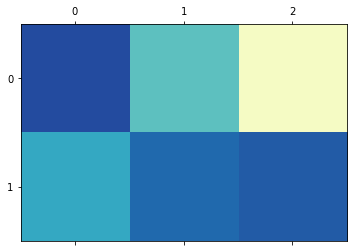

In [107]:
drawTensorEx(a)

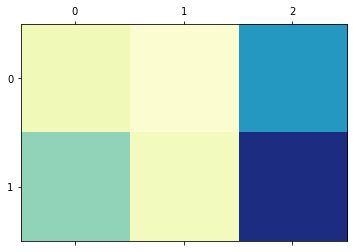

In [108]:
drawTensorEx(b)

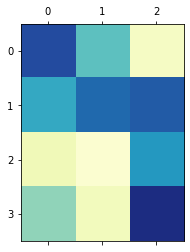

In [109]:
drawTensorEx(ab_cat)

In [111]:
# stack : 텐서를 쌓는다. -> 차원을 새로 만들어야 한다. -> 차원 추가
ab_stack = torch.stack([a, b], dim=0)
ab_stack, ab_stack.size()

(tensor([[[0.8044, 0.4450, 0.0651],
          [0.5431, 0.7220, 0.7559]],
 
         [[0.1048, 0.0298, 0.5979],
          [0.3455, 0.0889, 0.9130]]]), torch.Size([2, 2, 3]))

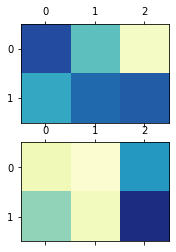

In [112]:
drawTensorEx(ab_stack)

## 텐서의 사칙연산, 내적(dot)

In [113]:
x = torch.Tensor([1, 2, 3])
y = torch.Tensor([4, 1, 2])
x, y

(tensor([1., 2., 3.]), tensor([4., 1., 2.]))

In [117]:
# 덧셈
torch.add(x, y), x + y

(tensor([5., 3., 5.]), tensor([5., 3., 5.]))

In [118]:
# 뺄셈
torch.sub(x, y), x - y

(tensor([-3.,  1.,  1.]), tensor([-3.,  1.,  1.]))

In [120]:
# 곱셈
torch.mul(x, y), x * y 

(tensor([4., 2., 6.]), tensor([4., 2., 6.]))

In [121]:
# 나눗셈
torch.div(x, y), x / y

(tensor([0.2500, 2.0000, 1.5000]), tensor([0.2500, 2.0000, 1.5000]))

In [123]:
# 내적
# 12 = 1 * 4 + 2 * 1 + 3 * 2
# 합성곱층에서 커널을 통과시켜서 특성을 추출할 때 계산식하고 동일
torch.dot(x, y), x.dot(y)

(tensor(12.), tensor(12.))

In [124]:
# 텐서의 스칼라 연산, 각 원소에 일일이 연산하여 처리
# [1 + 1, 2 + 1, 3 + 1]
x + 1

tensor([2., 3., 4.])

In [129]:
# 행렬의 곱
# mm()
x = torch.Tensor([[1, 3], [2, 4], [5, 7]])  # (3, 2)
y = torch.Tensor([[7, 9], [10, 2]])         # (2, 2)

#(3, 2) mm (2, 2) -> (3, 2)
torch.mm(x, y), x.mm(y)

# 37 = x[0, 0] * y[0, 0] + x[0, 1] * y[1, 0]
#    = 1 * 7 + 3 * 10

(tensor([[ 37.,  15.],
         [ 54.,  26.],
         [105.,  59.]]), tensor([[ 37.,  15.],
         [ 54.,  26.],
         [105.,  59.]]))

## sum, mean


In [134]:
# (2, 2, 2)
z = torch.Tensor([1, 2, 3, 4, 5, 6, 7, 8])
z.size(), z.shape

# z를 (2, 2, 2)로 만들어라.
z = z.view(2, 2, 2)
z.size()

torch.Size([2, 2, 2])

In [136]:
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [139]:
torch.sum(z, dim=0)

tensor([[ 6.,  8.],
        [10., 12.]])

In [141]:
torch.sum(z, dim=1)

tensor([[ 4.,  6.],
        [12., 14.]])

In [140]:
torch.sum(z, dim=2)

tensor([[ 3.,  7.],
        [11., 15.]])

In [143]:
torch.mean(z, dim=0)

tensor([[3., 4.],
        [5., 6.]])

In [0]:
torch.mean(z, dim=1)

In [0]:
torch.mean(z, dim=2)

## max, min, argmax, argmin

In [144]:
torch.max(z), torch.min(z)

(tensor(8.), tensor(1.))

In [145]:
# 그 값이 존재하는 위치값 -> 데이터를 flatten해서 인덱스를 계산했다.
# flatten(최대값, 최소값) 기준으로 나열해서 인덱스
torch.argmax(z), torch.argmin(z)

(tensor(7), tensor(0))

In [151]:
z1 = torch.Tensor([2, 5, 7, 1, 4, 8, 3, 6])
z1 = z1.view(2, 2, 2)

torch.argmax(z1), torch.argmin(z1)

(tensor(5), tensor(3))

In [146]:
# 1차원 기준으로 원소들을 수직으로 배치하고, 위에서 내려봤을 때 같은 포지션에 겹치는 원소끼리의 최대값
# -> 총 결과물이 4개가 나오고, 그 최대값과 그 위치값이 결과로 나온다.
torch.max(z, dim=0)

torch.return_types.max(values=tensor([[5., 6.],
        [7., 8.]]), indices=tensor([[1, 1],
        [1, 1]]))

## 논리 연산

- 같다, 작다, 크다, 크거나 같다, 작거나 같다

In [147]:
z = torch.Tensor([-4, 3, 0])
z

tensor([-4.,  3.,  0.])

In [149]:
# BoolTensor가 결론(True, False)

# 같다.
print(z.eq(0))
print(z == 0)

# 크거나 같다.
print(z.ge(0))
print(z >= 0)

# 작거나 같다.
print(z.ge(0))
print(z <= 0)

# 크다
print(z.gt(0))
print(z > 0)

# 작다
print(z.lt(0))
print(z < 0)

tensor([False, False,  True])
tensor([False, False,  True])
tensor([False,  True,  True])
tensor([False,  True,  True])
tensor([False,  True,  True])
tensor([ True, False,  True])
tensor([False,  True, False])
tensor([False,  True, False])
tensor([ True, False, False])
tensor([ True, False, False])
